<a href="https://colab.research.google.com/github/giuliabugatti09/sentiment-analysis-comments/blob/main/giuliabugatti09_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de Sentimentos com Naive Bayes**

Este projeto tem como objetivo realizar a análise de sentimentos em resenhas de filmes utilizando o algoritmo Naive Bayes. O modelo foi treinado com o dataset IMDb disponibilizado pelo NLTK, e classifica as resenhas como positivas ou negativas.

📖 **Descrição:**

Neste projeto, usamos o Naive Bayes para treinar um modelo de classificação de texto e prever o sentimento de resenhas de filmes. O dataset utilizado é composto por resenhas de filmes e seus respectivos sentimentos (positivo ou negativo).

# **Gráfico de Acurácia**

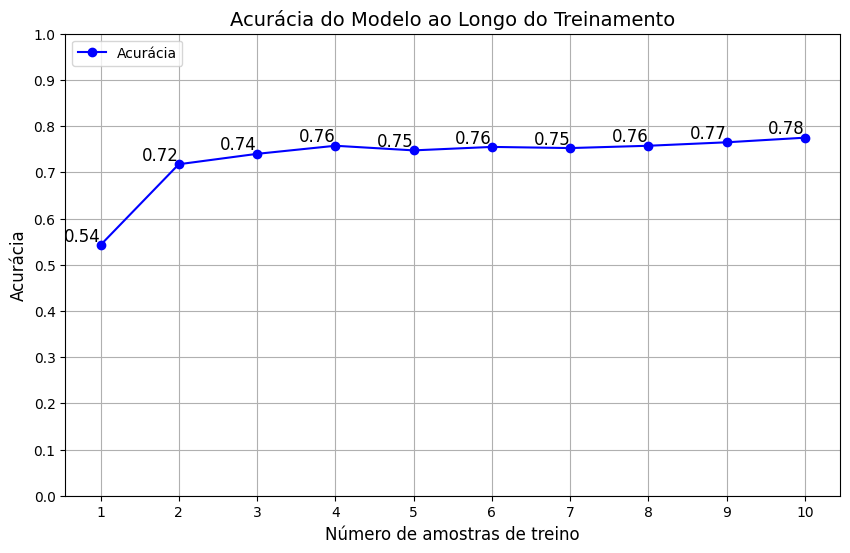

In [ ]:
# Salvar o gráfico como imagem
plt.figure(figsize=(10, 6))

# Plotando a linha do gráfico
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b', label='Acurácia')

# Adicionando rótulos de acurácia nos pontos
for i, acc in enumerate(accuracies):
    plt.text(i + 1, acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', color='black')

# Adicionando título e rótulos
plt.title('Acurácia do Modelo ao Longo do Treinamento', fontsize=14)
plt.xlabel('Número de amostras de treino', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)

# Personalizando o gráfico
plt.grid(True)  # Adiciona linhas de grade para melhorar a leitura
plt.xticks(range(1, 11))  # Define os valores do eixo X
plt.yticks([x / 10 for x in range(0, 11)])  # Define os valores do eixo Y

# Adicionando legenda
plt.legend(loc='upper left')

# Salvar o gráfico em um arquivo .png
plt.savefig('acuracia_do_modelo.png', format='png', bbox_inches='tight')

# Mostrar o gráfico
plt.show()

# **Matriz de confusão**

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg
              precision    recall  f1-score   support

         neg       0.77      0.85      0.81       199
         pos       0.83      0.75      0.79       201

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



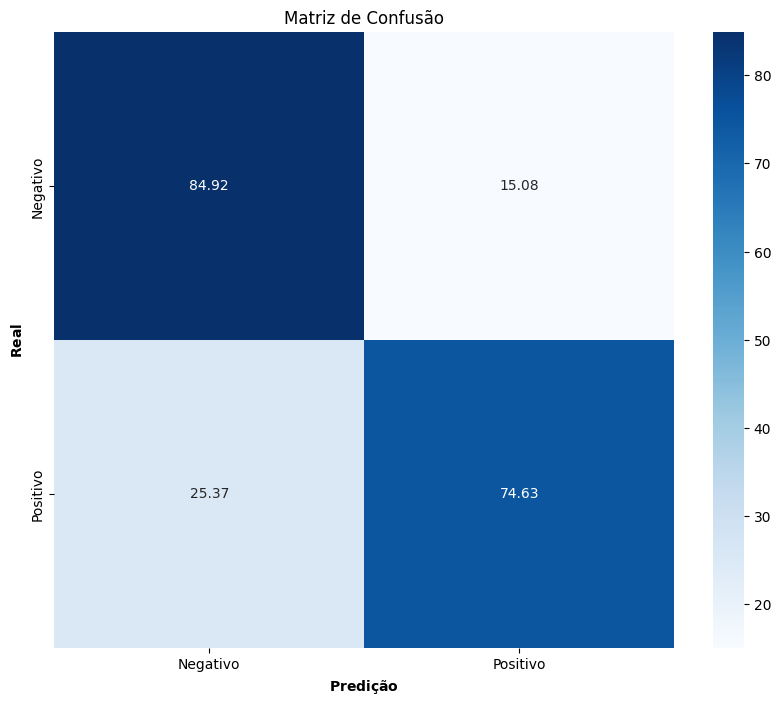

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

# Matriz de confusão com porcentagens
conf_matrix = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
conf_matrix_percent = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

# Plotar a matriz de confusão detalhada
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel(r'$\bf{Predição}$')
plt.ylabel(r'$\bf{Real}$')
plt.show()


# **Métricas de desempenho**

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                          comentario sentimento
0  plot : two teen couples go to a church party ,...        neg
1  the happy bastard ' s quick movie review damn ...        neg
2  it is movies like these that make a jaded movi...        neg
3  " quest for camelot " is warner bros . ' first...        neg
4  synopsis : a mentally unstable man undergoing ...        neg


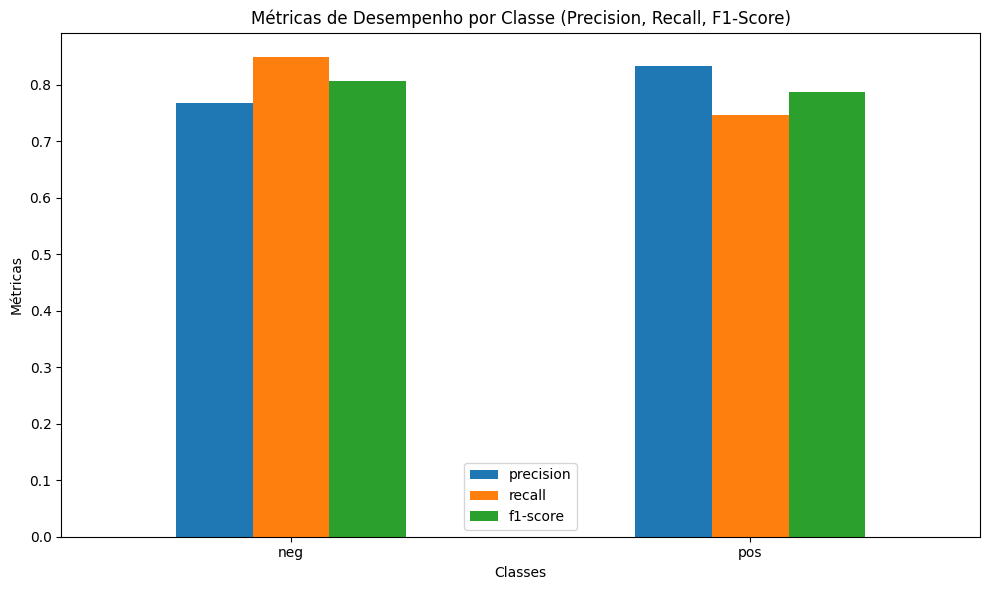

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Visualizar as primeiras linhas
print(data.head())

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliação
report = classification_report(y_test, y_pred, output_dict=True)

# Converter o relatório para um DataFrame para visualização
metrics = pd.DataFrame(report).transpose()

# Selecionar as métricas que desejamos plotar
metrics = metrics.loc[['neg', 'pos'], ['precision', 'recall', 'f1-score']]

# Plotar as métricas
metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Métricas de Desempenho por Classe (Precision, Recall, F1-Score)')
plt.xlabel('Classes')
plt.ylabel('Métricas')
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gráfico
plt.show()


# **Fluxograma do projeto- interativo**

In [ ]:
import plotly.graph_objects as go

# Dados para o gráfico
nodes = [
    "Carregamento dos Dados",
    "Pré-processamento",
    "Treinamento do Modelo",
    "Avaliação do Modelo",
    "Previsão"
]
edges = [
    ("Carregamento dos Dados", "Pré-processamento"),
    ("Pré-processamento", "Treinamento do Modelo"),
    ("Treinamento do Modelo", "Avaliação do Modelo"),
    ("Avaliação do Modelo", "Previsão")
]
values = [100, 90, 80, 75]  # Exemplo de valores (quantidade de dados em cada etapa)

# Criar índices dos nodes
sources = [nodes.index(edge[0]) for edge in edges]
targets = [nodes.index(edge[1]) for edge in edges]

# Configurar o Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.8),
        label=nodes,
        color=["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A"]  # Cores personalizadas
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(100, 149, 237, 0.4)"  # Cor translúcida das conexões
    )
)])

# Configurações do layout
fig.update_layout(
    title_text="Fluxograma do Projeto: Análise de Sentimentos",
    title_font_size=20,
    font=dict(size=14),
    height=600,
    width=900,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor="white",
    plot_bgcolor="white"
)

# Mostrar o gráfico
fig.show()


#**Exemplo de entrada e saída**

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


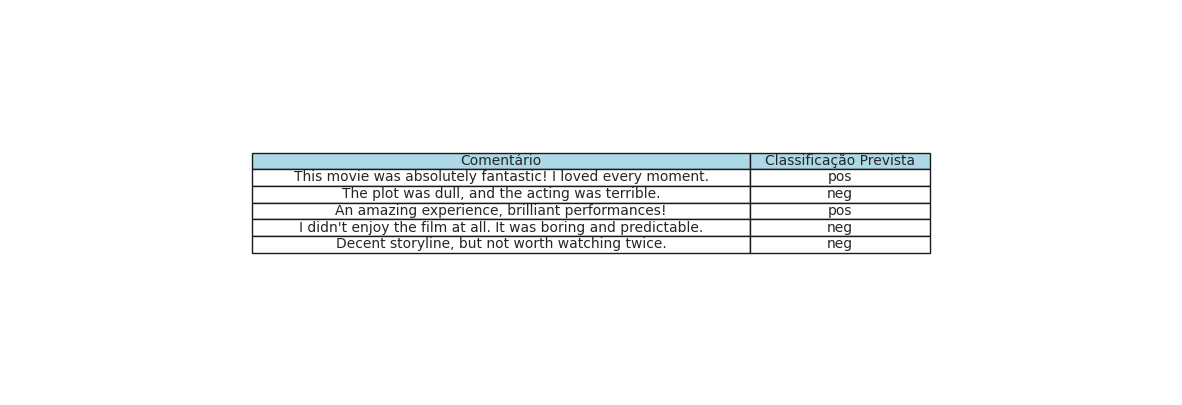

In [18]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

# Baixar e carregar o dataset
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Criar o DataFrame
data = pd.DataFrame({
    'comentario': [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()],
    'sentimento': [fileid.split('/')[0] for fileid in movie_reviews.fileids()]
})

# Pré-processamento
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comentario'])
y = data['sentimento']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = MultinomialNB()
model.fit(X_train, y_train)

# Exemplo de entrada e saída
exemplos = pd.DataFrame({
    "Comentário": [
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ],
    "Classificação Prevista": model.predict(vectorizer.transform([
        "This movie was absolutely fantastic! I loved every moment.",
        "The plot was dull, and the acting was terrible.",
        "An amazing experience, brilliant performances!",
        "I didn't enjoy the film at all. It was boring and predictable.",
        "Decent storyline, but not worth watching twice."
    ]))
})

# Configurar estilo do Seaborn
sns.set_theme(style="whitegrid")

# Plotar a tabela estilizada
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=exemplos.values,
    colLabels=exemplos.columns,
    cellLoc="center",
    loc="center",
    colColours=["#ADD8E6", "#ADD8E6"]
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(exemplos.columns))))



# Mostrar o gráfico no Colab
plt.show()
